In [38]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from env import get_db_url
import os
# from acquire import wrangle_store_data

import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

from acquire import germany_opsd

In [3]:
def get_store_data():
    '''
    Returns a dataframe of all store data in the tsa_item_demand database and saves a local copy as a csv file.
    '''
    query = '''
    SELECT *
    FROM items
    JOIN sales USING(item_id)
    JOIN stores USING(store_id) 
    '''
    
    df = pd.read_sql(query, get_db_url('tsa_item_demand'))
    
    df.to_csv('tsa_item_demand.csv', index=False)
    
    return df

In [2]:
def wrangle_store_data():
    filename = 'tsa_store_data.csv'
    
    if os.path.isfile(filename):
        df = pd.read_csv(filename, index_col=0)
    else:
        df = get_store_data()
        
    return df

In [4]:
df = wrangle_store_data()

In [6]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_date,sale_amount,store_address,store_zipcode,store_city,store_state
0,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,2013-01-01,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,2013-01-02,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,2013-01-03,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
3,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,2013-01-04,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
4,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,2013-01-05,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


### Convert date column to datetime format.

In [14]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   store_id       913000 non-null  int64         
 1   item_id        913000 non-null  int64         
 2   item_upc14     913000 non-null  object        
 3   item_upc12     913000 non-null  object        
 4   item_brand     913000 non-null  object        
 5   item_name      913000 non-null  object        
 6   item_price     913000 non-null  float64       
 7   sale_id        913000 non-null  int64         
 8   sale_date      913000 non-null  datetime64[ns]
 9   sale_amount    913000 non-null  int64         
 10  store_address  913000 non-null  object        
 11  store_zipcode  913000 non-null  object        
 12  store_city     913000 non-null  object        
 13  store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(8

### Plot the distribution of sale_amount and item_price.

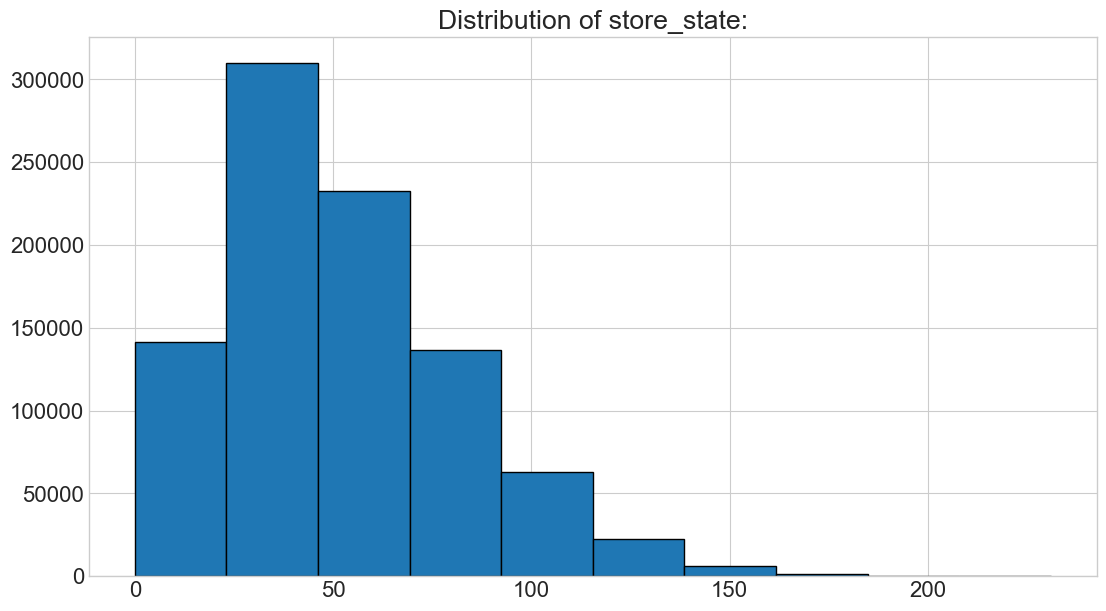

In [17]:
plt.hist(df['sale_amount'], edgecolor='black')
plt.title(f'Distribution of {col}:')
plt.show()

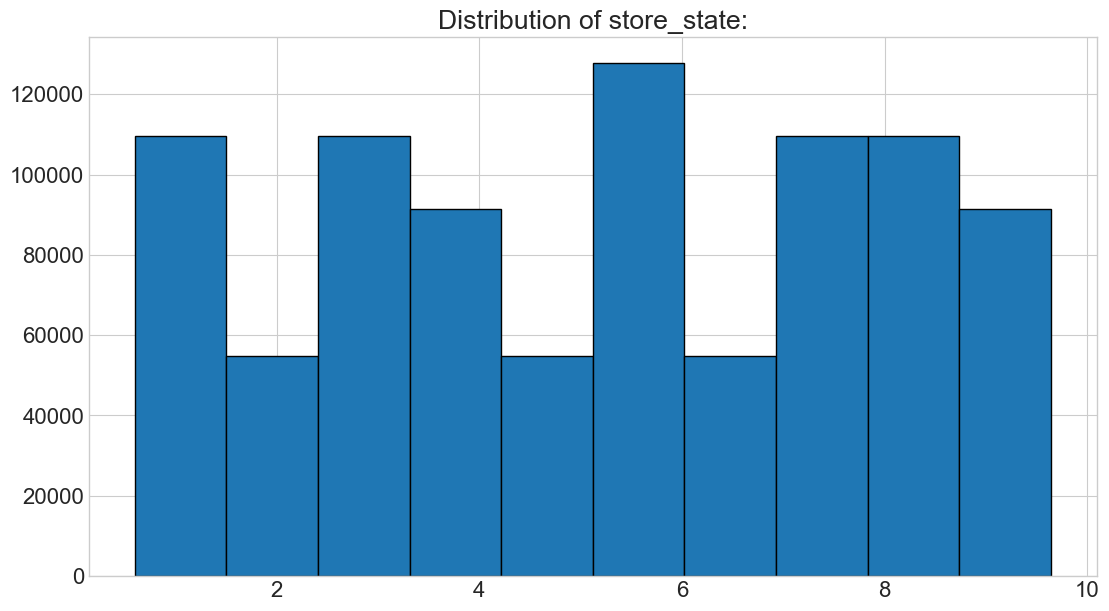

In [18]:
plt.hist(df['item_price'], edgecolor='black')
plt.title(f'Distribution of {col}:')
plt.show()

### Set the index to be the datetime variable.

In [19]:
df = df.set_index('sale_date')

In [32]:
df.head()


,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


### Add a 'month' and 'day of week' column to your dataframe.

In [34]:
df['month'] = df.index.month
df['day'] = df.index.day

In [35]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,3
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,4
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,5


### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [36]:
df['sales_total'] = df.sale_amount * df.item_price

In [37]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,1,10.92
2013-01-02,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,2,11,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,2,9.24
2013-01-03,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,3,14,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,3,11.76
2013-01-04,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,4,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,4,10.92
2013-01-05,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,5,10,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,1,5,8.40


In [39]:
df = germany_opsd()

In [40]:
df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


### Convert date column to datetime format.

In [46]:
df.Date = pd.to_datetime(df['Date'])

### Plot the distribution of each of your variables.

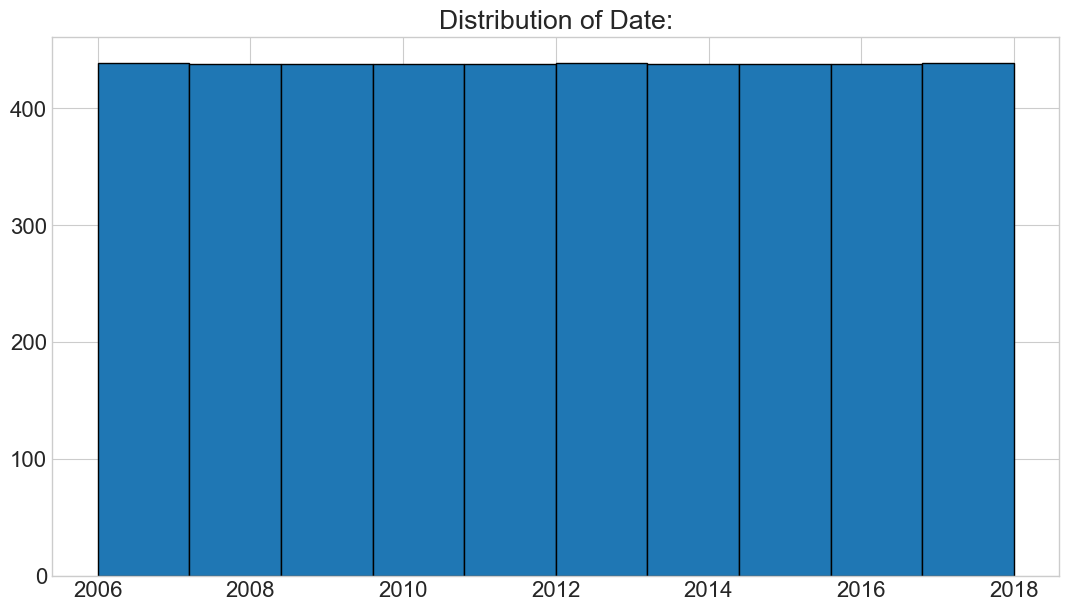

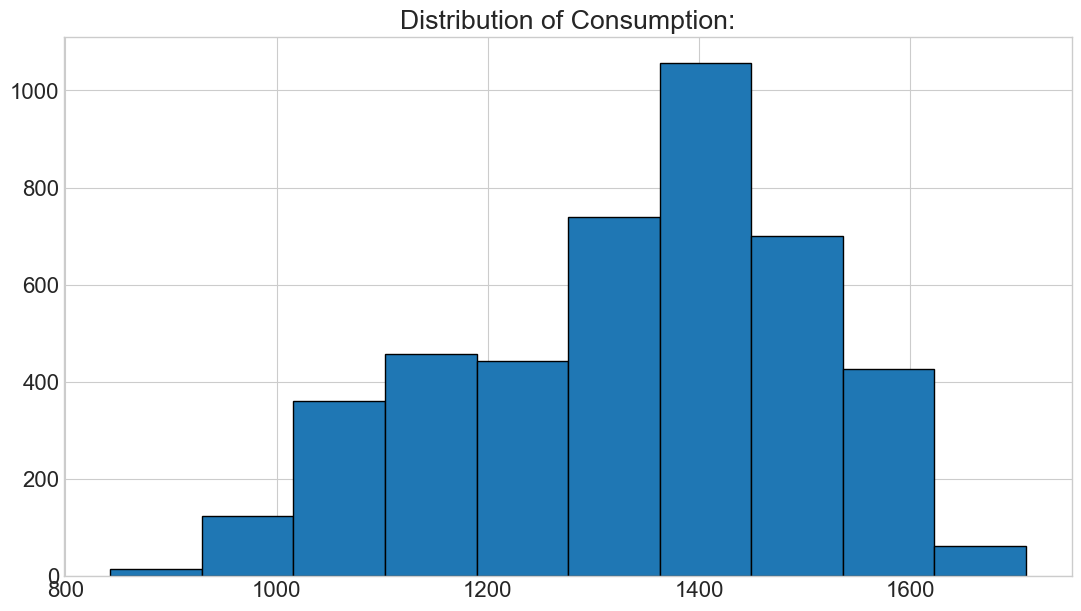

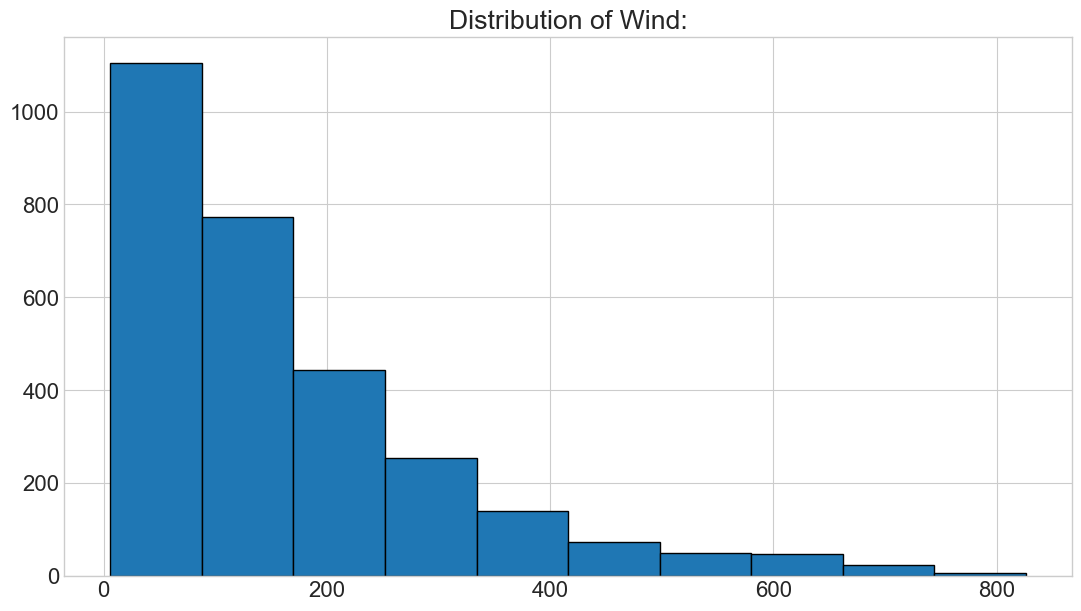

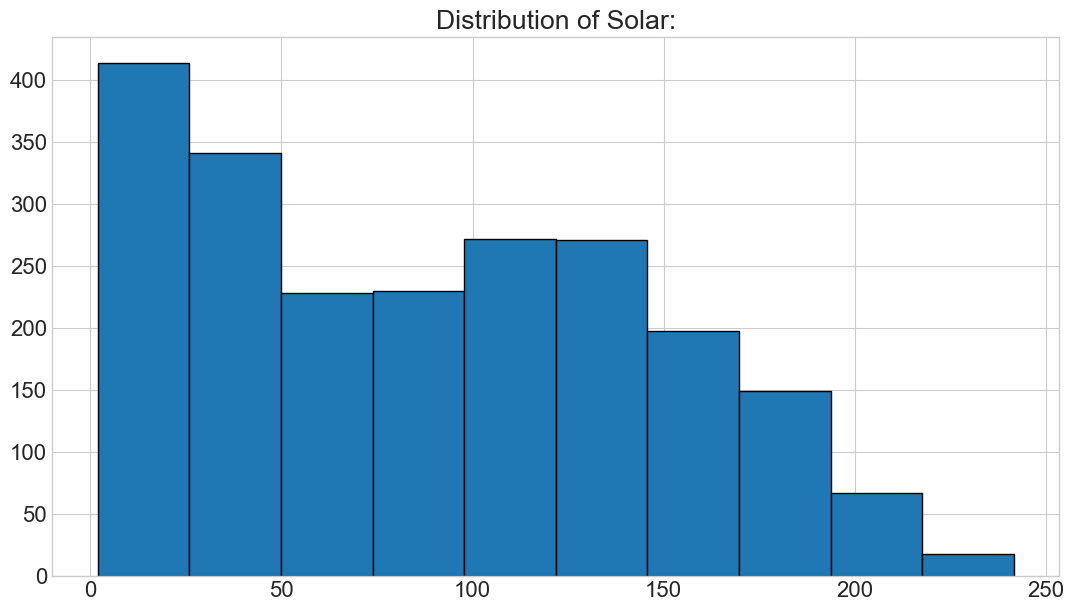

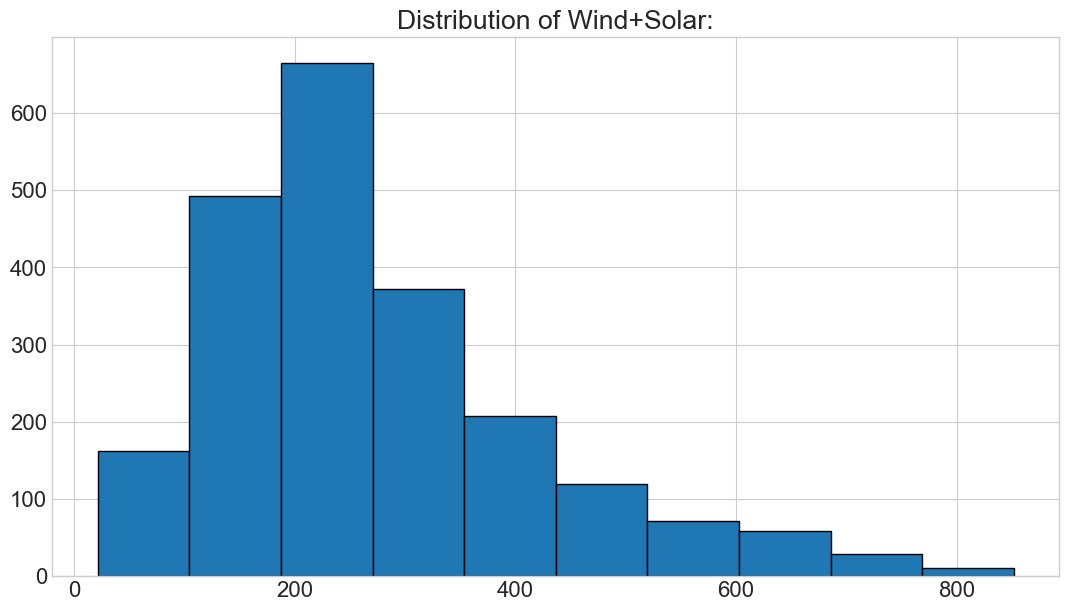

In [48]:
for col in df.columns:
    plt.hist(df[col], edgecolor='black')
    plt.title(f'Distribution of {col}:')
    plt.show()

### Set the index to be the datetime variable.

In [49]:
df = df.set_index('Date')

In [50]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### Add a month and a year column to your dataframe.

In [63]:
df['month'] = df.index.month
df['year'] = df.index.year

In [64]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,day,year
Date,,,,,,,
2006-01-01,1069.184,164.845862,89.290499,272.435301,1,1,2006
2006-01-02,1380.521,164.845862,89.290499,272.435301,1,2,2006
2006-01-03,1442.533,164.845862,89.290499,272.435301,1,3,2006
2006-01-04,1457.217,164.845862,89.290499,272.435301,1,4,2006
2006-01-05,1477.131,164.845862,89.290499,272.435301,1,5,2006


### Fill any missing values.

In [55]:
df.isna().mean() * 100

Consumption     0.000000
Wind           33.378964
Solar          50.079854
Wind+Solar     50.102669
month           0.000000
day             0.000000
dtype: float64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   month        4383 non-null   int64  
 5   day          4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [61]:
df.fillna(df.mean(), inplace=True)

In [62]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,day
Date,,,,,,
2006-01-01,1069.184,164.845862,89.290499,272.435301,1,1
2006-01-02,1380.521,164.845862,89.290499,272.435301,1,2
2006-01-03,1442.533,164.845862,89.290499,272.435301,1,3
2006-01-04,1457.217,164.845862,89.290499,272.435301,1,4
2006-01-05,1477.131,164.845862,89.290499,272.435301,1,5
